# 分类变量特征提取

In [1]:
from sklearn.feature_extraction import DictVectorizer
onehot_encoder = DictVectorizer()
instances = [{'city':'New York'},{'city':'San Francisco'},{'city':'Chapel Hill'}]
print(onehot_encoder.fit_transform(instances).toarray())

[[ 0.  1.  0.]
 [ 0.  0.  1.]
 [ 1.  0.  0.]]


# 文字特征提取

在大多数词库模型中，特征向量的每一个元素是用二进制数表示单词是否在文档中。CountVectorizer类会把文档全部转换为小写，然后将文档词块化。文档词块化是把句子分割成词块或有意义的字母序列的过程。词块大多数是单词，但是她们也可能是一些短语，如标点符号和词缀。CountVectorizer类通过正则表达式用空格分割句子，然后抽取长度大于2的字母序列。

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
    'UNC played Duke in basketball',
    'Duke lost the basketball game'
]
vectorizer = CountVectorizer()
print(vectorizer.fit_transform(corpus).todense())
print(vectorizer.vocabulary_)

[[1 1 0 1 0 1 0 1]
 [1 1 1 0 1 0 1 0]]
{'unc': 7, 'played': 5, 'duke': 1, 'in': 3, 'basketball': 0, 'lost': 4, 'the': 6, 'game': 2}


In [5]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
    'UNC played Duke in basketball',
    'Duke lost the basketball game',
    'I ate a sandwich'
]
vectorizer = CountVectorizer()
print(vectorizer.fit_transform(corpus).todense())
print(vectorizer.vocabulary_)

[[0 1 1 0 1 0 1 0 0 1]
 [0 1 1 1 0 1 0 0 1 0]
 [1 0 0 0 0 0 0 1 0 0]]
{'unc': 9, 'played': 6, 'duke': 2, 'in': 4, 'basketball': 1, 'lost': 5, 'the': 8, 'game': 3, 'ate': 0, 'sandwich': 7}


In [7]:
from sklearn.metrics.pairwise import euclidean_distances
counts = vectorizer.fit_transform(corpus).todense()
for x,y in [[0,1],[0,2],[1,2]]:
    dist = euclidean_distances(counts[x],counts[y])
    print('文档{}与文档{}的距离{}'.format(x,y,dist))

文档0与文档1的距离[[ 2.44948974]]
文档0与文档2的距离[[ 2.64575131]]
文档1与文档2的距离[[ 2.64575131]]


# 停用词过滤

特征向量降维的一个基本方法是单词全部转成小写，因为单词的大小写一般不会影响意思，而首字母大写的单词一般只是在句子的开头，而词库模型并不在乎单词的位置和语法。另一种方法是去掉文集常用词，或称为停用词

In [8]:
corpus = [
    'UNC played Duke in basketball',
    'Duke lost the basketball game'
]
vectorizer = CountVectorizer(stop_words='english')
print(vectorizer.fit_transform(corpus).todense())
print(vectorizer.vocabulary_)

[[1 1 0 0 1 1]
 [1 1 1 1 0 0]]
{'unc': 5, 'played': 4, 'duke': 1, 'basketball': 0, 'lost': 3, 'game': 2}


# 词根还原(stemming)与词形还原(lemmatization)

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
    'He ate the sandwiches',
    'Every sandwich was eaten by him'
]
vectorizer = CountVectorizer(binary=True,stop_words='english')
print(vectorizer.fit_transform(corpus).todense())
print(vectorizer.vocabulary_)

[[1 0 0 1]
 [0 1 1 0]]
{'ate': 0, 'sandwiches': 3, 'sandwich': 2, 'eaten': 1}


In [4]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [2]:
corpus = [
    'I am gathering ingredients for the sandwich',
    'There were many wizards at the gathering'
]
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
print(lemmatizer.lemmatize('gathering','v'))
print(lemmatizer.lemmatize('gathering','n'))

gather
gathering


In [1]:
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import pos_tag
wordnet_tags = ['n','v']
corpus = [
    'He ate the sandwiches',
    'Every sandwich was eaten by him'
]
stemmer = PorterStemmer()
print('Stemmed:',[[stemmer.stem(token) for token in word_tokenize(document)] for document in corpus])

Stemmed: [['He', 'ate', 'the', 'sandwich'], ['everi', 'sandwich', 'wa', 'eaten', 'by', 'him']]


In [5]:
def lemmatize(token,tag):
    if tag[0].lower() in ['n','v']:
        return lemmatizer.lemmatize(token,tag[0].lower())
    return token
lemmatizer = WordNetLemmatizer()
tagged_corpus = [pos_tag(word_tokenize(document)) for document in corpus]
print('Lemmatized:',[[lemmatize(token,tag) for token,tag in document] for document in tagged_corpus])

Lemmatized: [['He', 'eat', 'the', 'sandwich'], ['Every', 'sandwich', 'be', 'eat', 'by', 'him']]


# 带TF-IDF权重的扩展词库

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = ['The dog ate a sandwich, the wizard transfigured a sandwich, and I ate a sandwich']
vectorizer = CountVectorizer(stop_words='english')
print(vectorizer.fit_transform(corpus).todense())
print(vectorizer.vocabulary_)

[[2 1 3 1 1]]
{'dog': 1, 'ate': 0, 'sandwich': 2, 'wizard': 4, 'transfigured': 3}


很多单词可能在两个文档的频率一样，但是两个文档的长度差别很大，一个文档比另一个文档长很多倍。scikit-learn的TfdfTransformer类可以解决这个问题，通过对词频特征向量归一化来实现不同文档向量的可比性。

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = [
    'The dog ate a sandwich and I ate a sandwich',
    'THe wizard transfigured a sandwich'
]
vectorizer = TfidfVectorizer(stop_words='english')
print(vectorizer.fit_transform(corpus).todense())
print(vectorizer.vocabulary_)

[[ 0.75458397  0.37729199  0.53689271  0.          0.        ]
 [ 0.          0.          0.44943642  0.6316672   0.6316672 ]]
{'dog': 1, 'ate': 0, 'sandwich': 2, 'wizard': 4, 'transfigured': 3}


# 通过哈希技巧实现特征向量

前面是用包含文集所有词块的词典来完成文档词块与特征向量的映射的，这样做有两个缺点，首先是文集需要被调用两次，第一次是创建词典，第二次是创建文档的特征向量。另外，词典必须存储在内存里，如果文集很大就会很耗内存，通过哈希表可以有效的解决这些问题。

In [1]:
from sklearn.feature_extraction.text import HashingVectorizer
corpus = ['the','ate','bacon','cat']
vectorizer = HashingVectorizer(n_features=6)
print(vectorizer.transform(corpus).todense())

[[-1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0.  0.]]


哈希技巧是无固定状态的(stateless)，它把任意的数据块映射到固定数目的位置，并且保证相同的输入一定产生相同的输出，不同的输入尽可能产生不同的输出。它可以用并行，线上，流式传输创建特征向量，因为它初始化是不需要文集输入。n_features是一个可选参数，默认值是$2^20$ ，这里设置成6是为了演示。另外，注意有些单词频率是负数。由于Hash碰撞可能发生，所以 HashingVectorizer用有符号哈希函数(signed hash function)。特征值和它的词块的哈希值带同样符号，如果cats出现过两次，被哈希成-3，文档特征向量的第四个元素要减去2。如果dogs出现过两次，被哈希成3，文档特征向量的第四个元素要加上2。用带符号哈希函数可以把词块发生哈希碰撞的概率相互抵消掉，信息损失比信息损失的同时出现信息冗余要好。哈希技巧的一个不足是模型的结果更难察看，由于哈希函数不能显示哪个词块映射到特征向量的哪个位置了。

# 图片特征提取

Digit: 0
[[  0.   0.   5.  13.   9.   1.   0.   0.]
 [  0.   0.  13.  15.  10.  15.   5.   0.]
 [  0.   3.  15.   2.   0.  11.   8.   0.]
 [  0.   4.  12.   0.   0.   8.   8.   0.]
 [  0.   5.   8.   0.   0.   9.   8.   0.]
 [  0.   4.  11.   0.   1.  12.   7.   0.]
 [  0.   2.  14.   5.  10.  12.   0.   0.]
 [  0.   0.   6.  13.  10.   0.   0.   0.]]


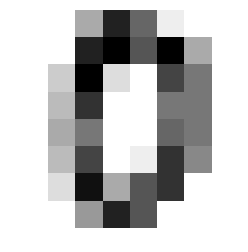

In [3]:
%matplotlib inline
from sklearn import datasets
import matplotlib.pyplot as plt
digits = datasets.load_digits()
print('Digit:',digits.target[0])
print(digits.images[0])
plt.figure()
plt.axis('off')
plt.imshow(digits.images[0],cmap=plt.cm.gray_r,interpolation='nearest')
plt.show()

将8*8矩阵转化成64维向量来创建一个特征向量

In [4]:
print('Feature vector:\n',digits.images[0].reshape(-1,64))

Feature vector:
 [[  0.   0.   5.  13.   9.   1.   0.   0.   0.   0.  13.  15.  10.  15.
    5.   0.   0.   3.  15.   2.   0.  11.   8.   0.   0.   4.  12.   0.
    0.   8.   8.   0.   0.   5.   8.   0.   0.   9.   8.   0.   0.   4.
   11.   0.   1.  12.   7.   0.   0.   2.  14.   5.  10.  12.   0.   0.
    0.   0.   6.  13.  10.   0.   0.   0.]]


# 对感兴趣的点进行特征提取

In [5]:
%matplotlib inline
import numpy as np
from skimage.feature import corner_harris,corner_peaks
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
import skimage.io as io
from skimage.exposure import equalize_hist

def show_corners(corners,image):
    fig = plt.figure()
    plt.gray()
    plt.imshow(image)
    y_corner,x_corner = zip(*corners)
    plt.plot(x_corner,y_corner,'or')
    plt.xlim(0,image.shape[1])
    plt.ylim(image.shape[0],0)
    fig.set_size_inches(np.array(fig.get_size_inches())*1.5)
    plt.show()
    
mandrill = io.imread('mlslpic/3.1 mandrill.png')
mandrill = equalize_hist(rgb2gray(mandrill))
corners = corner_peaks(corner_harris(mandrill),min_distance=2)
show_corners(corners,mandrill)

# SIFT & SURF

In [ ]:
import mahotas as mh
from mahotas.features import surf

image = mh.imread('zipper.jpg',as_grey=True)
print('The first SURF descriptor:\n',surf.surf(image)[0])
print('Extraced %s SURF descriptors'% len(surf.surf(image)))

# 数据标准化

In [6]:
from sklearn import preprocessing
import numpy as np
X = np.array([
    [0.,0.,5.,13.,9.,1.],
    [0.,0.,13.,15.,10.,15.],
    [0.,3.,15.,2.,0.,11.]
])
print(preprocessing.scale(X))

[[ 0.         -0.70710678 -1.38873015  0.52489066  0.59299945 -1.35873244]
 [ 0.         -0.70710678  0.46291005  0.87481777  0.81537425  1.01904933]
 [ 0.          1.41421356  0.9258201  -1.39970842 -1.4083737   0.33968311]]
